<a href="https://colab.research.google.com/github/nikhildhavale/pythonLearning/blob/main/gausiannaivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature matrix shape: (150, 4)
Target vector shape : (150,)
Classes             : ['setosa' 'versicolor' 'virginica']

First 5 rows:
 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm) species
               5.1               3.5                1.4               0.2  setosa
               4.9               3.0                1.4               0.2  setosa
               4.7               3.2                1.3               0.2  setosa
               4.6               3.1                1.5               0.2  setosa
               5.0               3.6                1.4               0.2  setosa

Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Shapes after train-test split:
X_train: (120, 4)
X_test : (30, 4)

GaussianNB model trained.

GaussianNB for Breast cancer model trained.

Accuracy (for Iris):
Training accuracy (for Iris): 0.9583
Test accuracy (for Iris): 0.9667

Accuracy (for Breast cancer):
Trainin

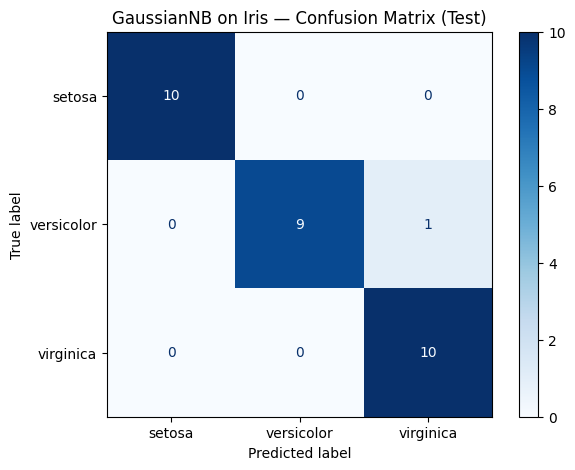


Input features:
Sepal length: 6.3
Sepal width : 3.4
Petal length: 5.6
Petal width : 2.4

Prediction:
Predicted species: virginica

Class probabilities:
P(setosa | x) = 0.0000
P(versicolor | x) = 0.0000
P(virginica | x) = 1.0000


In [1]:
#GaussianNB ---> Iris + Breast cancer dataset:

# ----------------------------------------------------
# Naive Bayes (GaussianNB) on Iris Dataset
# ----------------------------------------------------
# - 3 classes: setosa, versicolor, virginica
# - Continuous features: sepal length/width, petal length/width
# - GaussianNB model
# - Helper function for prediction with user inputs
# ----------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = (7, 5)
np.random.seed(42)


# 1. LOAD DATA
# ------------
iris = load_iris()
X = iris.data                     # shape: (150, 4)
y = iris.target                   # shape: (150,)
feature_names = iris.feature_names
class_names = iris.target_names   # ['setosa' 'versicolor' 'virginica']

data = load_breast_cancer()
X_data = data.data
y_data = data.target

print("Feature matrix shape:", X.shape)
print("Target vector shape :", y.shape)
print("Classes             :", class_names)

# Optional: create a DataFrame for easy viewing
df = pd.DataFrame(X, columns=feature_names)
df["species"] = [class_names[idx] for idx in y]

print("\nFirst 5 rows:")
print(df.head().to_string(index=False))

print("\nClass distribution:")
print(df["species"].value_counts()) # 50, 50, 50 = 150


# 2. TRAIN–TEST SPLIT (for evaluation)
# ------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y # will not change anything
)

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

print("\nShapes after train-test split:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)


# 3. TRAIN GAUSSIAN NAIVE BAYES
# -----------------------------
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("\nGaussianNB model trained.")

gnb_data = GaussianNB()
gnb_data.fit(X_train_data, y_train_data)
print("\nGaussianNB for Breast cancer model trained.")

# 4. EVALUATE MODEL
# -----------------
y_train_pred = gnb.predict(X_train)
y_test_pred  = gnb.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test,  y_test_pred)

y_train_pred_data = gnb_data.predict(X_train_data)
y_test_pred_data  = gnb_data.predict(X_test_data)

train_acc_data = accuracy_score(y_train_data, y_train_pred_data)
test_acc_data  = accuracy_score(y_test_data,  y_test_pred_data)

print("\nAccuracy (for Iris):")
print(f"Training accuracy (for Iris): {train_acc:.4f}")
print(f"Test accuracy (for Iris): {test_acc:.4f}")

print("\nAccuracy (for Breast cancer):")
print(f"Training accuracy (for Breast cancer): {train_acc_data:.4f}")
print(f"Test accuracy (for Breast cancer): {test_acc_data:.4f}")

print("\nClassification report (Test):")
print(classification_report(y_test, y_test_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots()
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names).plot(
    ax=ax, cmap="Blues", values_format='d'
)
plt.title("GaussianNB on Iris — Confusion Matrix (Test)")
plt.show()


# 5. HELPER FUNCTION FOR USER PREDICTIONS
# ---------------------------------------
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    """
    Predict Iris species using the trained GaussianNB model.

    Parameters
    ----------
    sepal_length : float
    sepal_width  : float
    petal_length : float
    petal_width  : float

    Example:
        predict_iris(5.1, 3.5, 1.4, 0.2)
    """
    # Build a 2D array of shape (1, 4)
    sample = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Predict class index and probabilities
    pred_idx = gnb.predict(sample)[0]
    proba = gnb.predict_proba(sample)[0]

    pred_label = class_names[pred_idx]
    proba_dict = {class_names[i]: float(p) for i, p in enumerate(proba)}

    print("\nInput features:")
    print(f"Sepal length: {sepal_length}")
    print(f"Sepal width : {sepal_width}")
    print(f"Petal length: {petal_length}")
    print(f"Petal width : {petal_width}")

    print("\nPrediction:")
    print(f"Predicted species: {pred_label}")

    print("\nClass probabilities:")
    for species, p in proba_dict.items():
        print(f"P({species} | x) = {p:.4f}")

    return pred_label, proba_dict


# 6. EXAMPLE PREDICTION
# ---------------------
# Typical Setosa-like example
example_label, example_proba = predict_iris(6.3, 3.4, 5.6, 2.4)

# You can try other examples, e.g. Versicolor/Virginica-like:
# predict_iris(6.0, 2.9, 4.5, 1.5)
# predict_iris(6.7, 3.0, 5.2, 2.3)